In [1]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Step 2: Load dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Step 3: Features and Target
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7832167832167832
Confusion Matrix:
 [[74 13]
 [18 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83        87
           1       0.75      0.68      0.71        56

    accuracy                           0.78       143
   macro avg       0.77      0.76      0.77       143
weighted avg       0.78      0.78      0.78       143



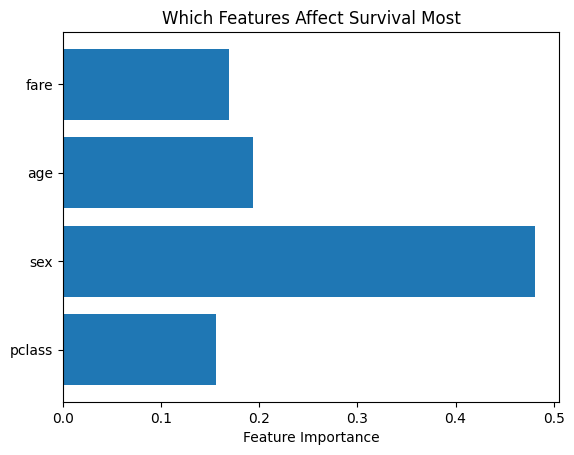

In [3]:
# Step 7: Show feature importance
import matplotlib.pyplot as plt
import numpy as np

importance = model.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.title("Which Features Affect Survival Most")
plt.show()